# <center>Анализ данных и прогноз оттока клиентов фитнесс-клуба</center>

## Описание данных
---

- '**Churn**' — факт оттока в текущем месяце   

### Данные клиента за предыдущий до проверки факта оттока месяц:  


- '**gender**' — пол  
- '**Near_Location**' — проживание или работа в районе, где находится фитнес-центр  
- '**Partner**' — сотрудник компании-партнёра клуба  
(сотрудничество с компаниями, чьи
сотрудники могут получать скидки на абонемент — в таком случае
фитнес-центр хранит информацию о работодателе клиента)  
- '**Promo_friends**' — факт первоначальной записи в рамках акции «приведи друга»  
(использовал промо-код от знакомого при оплате первого абонемента)  
- '**Phone**' — наличие контактного телефона  
- '**Age**' — возраст  
- '**Lifetime**' — время с момента первого обращения в фитнес-центр (в месяцах)  

### Информация на основе журнала посещений, покупок  и информация о текущем статусе абонемента клиента:  


- '**Contract_period**' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)  
- '**Month_to_end_contract**' — срок до окончания текущего действующего абонемента (в месяцах)  
- '**Group_visits**' — факт посещения групповых занятий  
- '**Avg_class_frequency_total**' — средняя частота посещений в неделю за все время с начала действия абонемента  
- '**Avg_class_frequency_current_month**' — средняя частота посещений в неделю за предыдущий месяц  
- '**Avg_additional_charges_total**' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон  
---

Импортируем необходимые для работы библиотеки:

In [1]:
# Для построения и обработки таблиц с данными
import pandas as pd

# Для визуализаций и построения графиков 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Фильтр незначительных предупреждений
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

---
# 1. Подготовка и предварительный анализ данных  

## 1.1. Подготовка данных
---

In [2]:
# Загружаем данные  

df = pd.read_csv('D:\\Netology\\Модуль 5. Python\\TOTAL_Analytics_fitness\\gym_dataset.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0


In [3]:
# Проверяем наличие повторов записей

df.duplicated().value_counts()

False    4000
dtype: int64

In [4]:
# Смотрим на описание данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# Выводим основную статистику

df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,5.011500,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.899573,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,1.000000


---
- Набор данных состоит из 4000 записей, состоящих из 14 параметров.  
- Повторов записей нет.
- Все данные имеют численное выражение (целые и дробные).  
- Значений, не соответствующих условиям диапазона для допустимых нет.  
- Исходя из известных диапазонов значений, по основной статистике можем сделать вывод об осутствии выбросов в значениях, кроме параметра 'Avg_additional_charges_total'.  
- Пропусков нет. На всякий случай проверяем:
---

In [6]:
# Считаем количество пропусков в каждом столбце

print(df.isnull().sum())

# % пропусков в каждом столбце
# (df.isnull().mean() * 100).round(2)

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


---
Стоит проверить наличие выбросов в значениях параметра 'Avg_additional_charges_total' (суммарная выручка от других услуг)  
Через межквартильный размах корректно искать выбросы в нормально распределенных данных  
Оцениваем нормальность распределения визуально:

---

In [7]:
import scipy.stats as stats 
stats.normaltest(df['Avg_additional_charges_total'])

NormaltestResult(statistic=217.1033594810358, pvalue=7.187940729972919e-48)

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Density'>

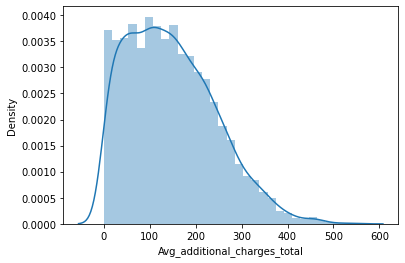

In [8]:
sns.distplot(df.Avg_additional_charges_total)

---
Видим распределение, похожее на нормальное, но 'односторонее'  
Выбросы возможны только со стороны upper_bound

---

In [9]:
# Проверяем наличие выбросов в столбце 'Avg_additional_charges_total'
# Допустинмые значения: >lower_bound и <upper_bound

q1 = df['Avg_additional_charges_total'].quantile(0.25)
q3 = df['Avg_additional_charges_total'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)

print('% выбросов по методу квантилей:',
    round(len(df[(
    (df['Avg_additional_charges_total'] < lower_bound) | 
    (df['Avg_additional_charges_total'] > upper_bound) 
)]) / len(df['Avg_additional_charges_total']) *100, 2)
)

% выбросов по методу квантилей: 0.73


<AxesSubplot:title={'center':'Распределение оценок'}>

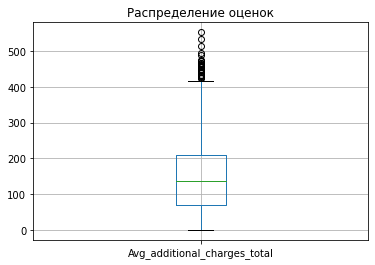

In [10]:
df['Avg_additional_charges_total'].plot(kind='box', title='Распределение оценок', grid=True)

In [11]:
# Выводим эти выбросы:

df[(
    (df['Avg_additional_charges_total'] < lower_bound) | 
    (df['Avg_additional_charges_total'] > upper_bound) 
)]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
5,1,1,0,0,1,1,1,34,450.743960,2,3,2.623477,2.637007,0
483,0,1,0,0,1,1,0,28,455.173225,2,5,2.092353,2.154556,0
761,0,1,0,0,1,1,1,27,472.318897,2,5,3.547490,3.755130,0
822,0,1,1,1,1,1,1,29,460.904008,2,10,3.157764,3.154869,0
862,1,1,0,0,1,1,0,34,445.954527,2,1,1.872359,1.892621,0
975,0,0,1,0,1,12,1,32,552.590740,12,1,0.887859,0.939304,0
999,0,1,1,1,1,12,1,28,457.406479,9,1,1.718064,1.655872,0
1400,1,1,0,0,1,6,1,31,462.178660,5,0,2.504586,2.453484,0
1597,0,0,0,0,1,6,0,31,471.720040,7,21,3.284087,3.294925,0
1756,1,1,0,0,1,1,1,30,456.861001,2,2,1.937277,2.011021,0


---
## 1.2. Предварительный анализ
---

In [16]:
# Оцениваем масштаб оттока

data = df[['Churn']].value_counts()
data = data.to_frame().reset_index()
data = data.rename(columns = {0:'count'})
data['% charn'] = round(data['count'] / data['count'].sum() * 100, 0).astype('int')

data

,Churn,count,% charn
0,0,2939,73
1,1,1061,27


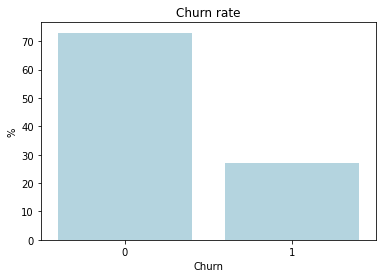

In [13]:
sns.barplot(x="Churn", y='% charn',color='lightblue', data=data)
plt.title("Churn rate")
plt.xlabel('Churn')
plt.ylabel('%')

plt.show()

---
Отток клиентов сотавляет 27%  
Строим матрицу корреляций, чтобы найти наиболее влияющие на отток факторы

---

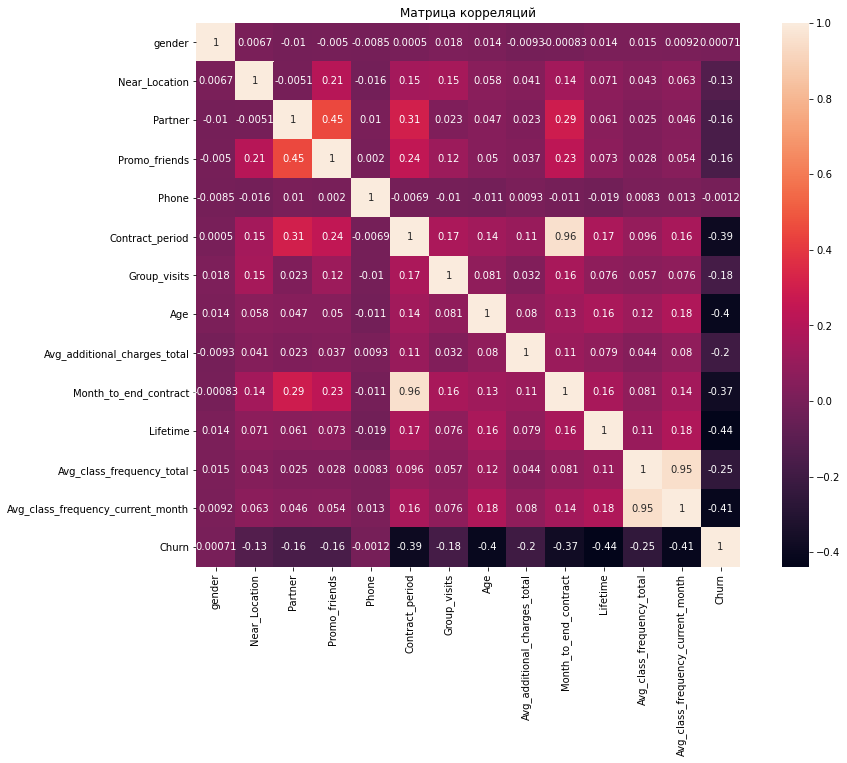

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df.corr(), annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()

In [15]:
df.corr()[['Churn']].sort_values(by = 'Churn')

,Churn
Lifetime,-0.438220
Avg_class_frequency_current_month,-0.412348
Age,-0.404735
Contract_period,-0.389984
Month_to_end_contract,-0.374307
Avg_class_frequency_total,-0.249715
Avg_additional_charges_total,-0.198697
Group_visits,-0.175325
Promo_friends,-0.162233
Partner,-0.157986


---
Наиболее сильная корреляция связана со сроком посещения, частотой посещений и возрастом клиентов.  
Можно выделить следующие характеристики, присущие потерянным клиентам:

- новые клиенты
- редко посесяющие клуб
- молодые клиенты
- с длительным абонементом

Длительность абонемента скорее всего следствие, поэтому является также зависимым параметром.  
То же самое можно сказать о продолжающих занятия клиентах.

Следовательно, нужно направить усилия на мотивацию клентов чаще заниматься.   
Упор сделать на более молодых.

**Предложение:**  
- Провести опрос редко занимающихся клиентов с целью выявления причин такого поведения
- По результатам опроса рассмотреть возможность устранения выявленных причин.

---

In [25]:
df[df['Churn']==1][['Age','Avg_class_frequency_current_month']]

,Age,Avg_class_frequency_current_month
7,30,1.049387
11,27,1.584316
13,27,0.000000
21,30,0.000000
23,32,1.043101
...,...,...
3982,24,0.789321
3984,22,0.343915
3986,34,0.304130
3994,26,0.269597


In [26]:
df[df['Churn']==1][['Age','Avg_class_frequency_current_month']].mean()

Age                                  26.989632
Avg_class_frequency_current_month     1.044546
dtype: float64

In [28]:
df[df['Churn']==0][['Age','Avg_class_frequency_current_month']].mean()

Age                                  29.976523
Avg_class_frequency_current_month     2.027882
dtype: float64

<AxesSubplot:ylabel='Density'>

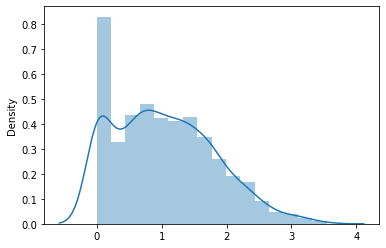

In [29]:
sns.distplot(df[df['Churn']==1][['Avg_class_frequency_current_month']])